Please, fill with your data:


| Student | ID |
|--- | --|
|student 1 | UCL-Id1|
|student 2 | UCL-Id2|

# Practical Homework 2 --- The Las Vegas $n$-Queens

In this homework we are going to analyse the Las Vegas $n$-Queens algorithm.
Imagine to have a $n\times n$ chessboard and exactly $n$ queens that we want to place on the board **safely**: they should be unable to attack each other (queens can attack other pieces horizontally, vertically and diagonally at any distance).

In order to find the **safe** state we have a list of strategies:

- **backtrack:** the quest starts at a given state and enumerates all the states one after another.
- **random:** at each iteration a random state is generated from zero

In [1]:
def print_board(size=8):
    for i in range(size):
        print('│', end='')
        for j in range(size // 2):
            if i%2 == 0:
                print('██  ', end='')
            else:
                print('  ██', end='')
        print('│')
        
print_board(8)

│██  ██  ██  ██  │
│  ██  ██  ██  ██│
│██  ██  ██  ██  │
│  ██  ██  ██  ██│
│██  ██  ██  ██  │
│  ██  ██  ██  ██│
│██  ██  ██  ██  │
│  ██  ██  ██  ██│


## Exercise 1

Compare the number of *moves* you need (on average) in the two strategies **backtrack** and **random** before reaching the *safe* state for different values of $n$.
In particular:

- **backtrack:**
    1. start placing the first queen in the first row of the first column;
    1. recursively place the following queen in the first *safe* row of the following column until no more queens can be placed in a *safe* way;
    1. (backtrack) move the last queen to the next *safe* place and restart from point 2; if no safe place is left remove the queen and repeat this point.
- **random:**
    1. place the first queen randomly in the first column;
    1. place the following queen in a random *safe* place on the following column until no *safe* places are available on next column
    1. if the number of queens on the board is less than $n$, restart from the beginning

Plot the number of *moves* as a function of the number $n$ of queens.
A *move* is defined as adding a new queen to the board (not removing it).

Which is the best strategy?

In [2]:
while True:
    print('step one')
    break

step one


Write here your comments

In [3]:
import numpy as np

def n_queen(size):
    """calls the n_queen_backtrack to output the result of placement.
    takes a number(lenght of one side of the board)
    returns a tuple of a boolean (true if queens can be placed) and total number of moves"""
    
    # create initial board
    board = np.zeros([size, size])
    
    # count moves
    move_count = 0
    
    def is_allowed(board, row, col):
        """ Takes a number(length of one side of board) and checks if a queen can be placed on 
        given cell board[row][col] verifiying if the cell is under attack of the queens 
        in the previous columns (from 0 to col -1)
        """
       # Return false if there is a queen on the left side of given row 
        for i in range(col): 
            if board[row][i] == 1: return False

        # Return false if there is a queen on upper diagonal of left side 
        for i, j in zip(range(row, -1, -1), range(col, -1, -1)): 
            if board[i][j] == 1: return False

        # Return false if there is a queen on lower diagonal of left side 
        for i, j in zip(range(row, board.shape[0], 1), range(col, -1, -1)): 
            if board[i][j] == 1: return False
  
        return True
    
    def n_queen_backtrack(board, col):
        """takes a matrix(board) and a column number and returns a boolean
        indicating if the queens can be placed or not"""
        # number of rows and cols
        length = board.shape[1]
        
        # keep track of move count in nonlocal scope
        nonlocal move_count
        # increment move_count for each recursive call
        move_count += 1
        #print("move OUT", move_count)
    
        # If all queens are placed ie 
        # if the current column reach the end of board return true
        if col >= length: return True
    
        # loop over all the rows of the given column and
        # verify if the current queen can be placed by calling is_allowed function
        for i in range(length): 
            # if is_allowed returns true for the current row
            # place the current queen in board[i][col]
            # by assigning the cell value to 1
            if is_allowed(board, i, col): 
                board[i][col] = 1                        
                # continue recursively placing the other queens in next cols
                # if placement of all the queens is possible return true
                if n_queen_backtrack(board, col + 1) == True: return True

            # after placing the queen in the current cell if the recursion does not 
            # output True, backtrack by assigning the cell to zero(0)and
            # continue looping on the remaining rows 
            board[i][col] = 0
            
        return False
    
    if n_queen_backtrack(board, 0) == False: 
        print ("No solution") 
        return False
    
    return True, move_count

In [ ]:
# list of number of queens (also side of the board)
num_queen_lst = list(range(4, 30))
move_count_lst = [n_queen(num)[1] for num in num_queen_lst]
move_count_lst

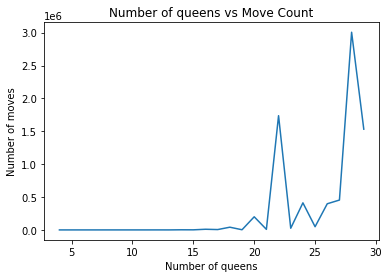

In [12]:
import matplotlib.pyplot as plt

# plot number of queens vs moves 
plt.plot(num_queen_lst, move_count_lst)

plt.xlabel("Number of queens")
plt.ylabel("Number of moves")
plt.title("Number of queens vs Move Count")
plt.show()

## Exercise 2

In the previous exercise the random generation of numbers is the bottleneck for the **random** strategy.

Compare now the running time required by the two methods to find the *safe* state (using for example `time.time`) and plot it as a function of the number $n$ of queens.
What changes?

In [15]:
import time

t1 = time.time()
while True:
    print('step one')
    break
print(time.time() - t1)

step one
0.00017261505126953125


Write here your comments

## Exercise 3

We want to check a mixed approach: for a given number $n$ of queens, place randomly only the first half of them (reducing drastically the state space left) and search with the **backtrack** algorithm the rest of them.

Compare the (average) time and number of *moves* to the previous results, how does it compare to the *pure* strategies?

In [4]:
print('Good luck')

Good luck


Write here your comments